# Introduction to Text Data

The reading from today showed by how to compute things like TF-IDF and cosine distance "from scratch" and using scikit-learn. We will generally rely on scikit-learn, so that is how you should solve these problems. However, you might want to do a few parts from scratch if you want to implement the process a little more concretely.

In [2]:
import pandas as pd

## The Gospels

The Christian Bible is a collection of books. Four of these books (Matthew, Mark, Luke, John) tell the life of Jesus; these 4 books are known as the "Gospels".

The text of the four books are stored in four files:
- Matthew: http://dlsun.github.io/stats112/data/gospels/matthew.txt
- Mark: http://dlsun.github.io/stats112/data/gospels/mark.txt
- Luke: http://dlsun.github.io/stats112/data/gospels/luke.txt
- John: http://dlsun.github.io/stats112/data/gospels/john.txt

The following reads the four texts into a list called `corpus`.

In [3]:
dir = "http://dlsun.github.io/stats112/data/gospels/"
gospel_files = ["matthew.txt", "mark.txt", "luke.txt", "john.txt"]

In [4]:
import requests

corpus = []
for text in gospel_files:
  response = requests.get(dir + text)
  corpus.append(response.text)

corpus

[' The book of the generation of Jesus Christ, the son of David, the\nson of Abraham.\n\n Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas\nand his brethren;  And Judas begat Phares and Zara of Thamar; and\nPhares begat Esrom; and Esrom begat Aram;  And Aram begat Aminadab;\nand Aminadab begat Naasson; and Naasson begat Salmon;  And Salmon\nbegat Booz of Rachab; and Booz begat Obed of Ruth; and Obed begat\nJesse;  And Jesse begat David the king; and David the king begat\nSolomon of her that had been the wife of Urias;  And Solomon begat\nRoboam; and Roboam begat Abia; and Abia begat Asa;  And Asa begat\nJosaphat; and Josaphat begat Joram; and Joram begat Ozias;  And\nOzias begat Joatham; and Joatham begat Achaz; and Achaz begat Ezekias;\n And Ezekias begat Manasses; and Manasses begat Amon; and Amon\nbegat Josias;  And Josias begat Jechonias and his brethren, about\nthe time they were carried away to Babylon:  And after they were\nbrought to Babylon, Jechonias begat Sa

1\. Construct the term-frequency matrix for this corpus, and calculate the Euclidean distances between all pairs of gospels. Based on this measure, which two gospels are most similar? Most different?

## scratch

In [5]:
from collections import Counter

pd_corpus = pd.Series(corpus)

bag_of_words = (
    pd_corpus.
    str.lower().
    # remove punctuation with space
    str.replace("[^\w\s]", "").
    str.split()
).apply(Counter)

bag_of_words

0    {'the': 1405, 'book': 1, 'of': 669, 'generatio...
1    {'the': 871, 'beginning': 3, 'of': 386, 'gospe...
2    {'forasmuch': 1, 'as': 114, 'many': 30, 'have'...
3    {'in': 223, 'the': 1039, 'beginning': 6, 'was'...
dtype: object

In [6]:
tf = pd.DataFrame(list(bag_of_words))
tf

,the,book,of,generation,jesus,"christ,",son,"david,",abraham.,abraham,...,girdest,walkedst,wouldest:,following;,leaned,die:,die;,testifieth,contain,books
0,1405,1.0,669,7.0,147,6,60,3,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,871,1.0,386,2.0,79,3,29,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1427,3.0,785,4.0,72,3,127,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1039,NaN,473,NaN,221,9,48,1,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
tf = tf.fillna(0)
tf

,the,book,of,generation,jesus,"christ,",son,"david,",abraham.,abraham,...,girdest,walkedst,wouldest:,following;,leaned,die:,die;,testifieth,contain,books
0,1405,1.0,669,7.0,147,6,60,3,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,871,1.0,386,2.0,79,3,29,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1427,3.0,785,4.0,72,3,127,4,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1039,0.0,473,0.0,221,9,48,1,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## scikit-learn

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
vec.fit(corpus)
tf_sparse = vec.transform(corpus)

tf_sparse

<4x3452 sparse matrix of type '<class 'numpy.int64'>'
	with 7515 stored elements in Compressed Sparse Row format>

In [10]:
tf_sparse.todense()

matrix([[254,   0,   1, ...,   2,   0,   2],
        [150,   0,   0, ...,   0,   0,   0],
        [329,   1,   2, ...,   0,   1,   1],
        [163,   0,   0, ...,   0,   0,   0]])

In [11]:
pd.DataFrame(
    tf_sparse.todense(),
    columns=vec.get_feature_names_out(),
)

,a,aaron,abased,abba,abel,abia,abiathar,abide,abideth,abiding,...,youth,zabulon,zacchaeus,zacharias,zara,zeal,zebedee,zebedees,zelotes,zorobabel
0,254,0,1,0,1,2,0,1,0,0,...,1,2,0,1,1,0,4,2,0,2
1,150,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,4,0,0,0
2,329,1,2,0,1,1,0,3,0,1,...,1,0,3,10,0,0,1,0,1,1
3,163,0,0,0,0,0,0,10,6,1,...,0,0,0,0,0,1,1,0,0,0


In [12]:
set(tf.columns) - set(vec.get_feature_names_out())

{'through.',
 'sayings:',
 'sign?',
 'jona:',
 'saith.',
 'water:',
 'heavy,)',
 'jews:',
 'fear,',
 'others;',
 'enter,',
 'destroy,',
 'dalmanutha.',
 'repent;',
 '(howbeit',
 'merry:',
 'abased;',
 'caesar’s.',
 'servant.',
 'cattle,',
 'pleased.',
 'company.',
 'corner?',
 'bear:',
 'was,',
 'barabbas,',
 'proverb.',
 'cleopas,',
 'minister;',
 'places.',
 'live.',
 'find,',
 'village:',
 'grew,',
 'save.',
 'glorified.',
 'season,',
 'me,',
 'liveth.',
 'bare,',
 'watching:',
 'malchus.',
 'vexed:',
 'disciples.',
 'branch,',
 'capernaum;',
 'nazareth,',
 'see?',
 'anguish,',
 'corpse,',
 '(not',
 'thyself;',
 'hearts,',
 'established.',
 'discreetly,',
 'three,',
 'counsel,',
 'prisoner,',
 'prison.',
 'beast,',
 'matter.',
 'worthy;',
 'age:',
 'judaea,',
 'elisabeth’s',
 'tombs.',
 'unfruitful.',
 'two,',
 'jesus.',
 'shortened.',
 'roots.',
 'stripes,',
 'israel,',
 'women.',
 'heavy.',
 'bartimaeus,',
 'affrighted,',
 'journey.',
 'jew,',
 'do.',
 'bank,',
 'divorcement:',
 '

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tf)

array([[   0.        ,  896.99163876,  616.54602424,  949.91157483],
       [ 896.99163876,    0.        , 1196.21778953,  774.53211683],
       [ 616.54602424, 1196.21778953,    0.        , 1313.6396005 ],
       [ 949.91157483,  774.53211683, 1313.6396005 ,    0.        ]])

In [14]:
euclidean_distances(tf_sparse)

array([[   0.        ,  925.11728986,  639.32464367,  993.62769688],
       [ 925.11728986,    0.        , 1243.08406795,  834.08512755],
       [ 639.32464367, 1243.08406795,    0.        , 1357.69289606],
       [ 993.62769688,  834.08512755, 1357.69289606,    0.        ]])

Books 2 and 4 are the closest in euclidean distance. Book 2 is Mark and Book 4 is John.

2\. Calculate the cosine distances between all pairs of gospels. What do you notice now? How does your conclusion compare to part 1?

In [15]:
from sklearn.metrics.pairwise import cosine_distances

cosine_distances(tf_sparse)

array([[0.        , 0.02348578, 0.01533848, 0.05390046],
       [0.02348578, 0.        , 0.0146853 , 0.08256973],
       [0.01533848, 0.0146853 , 0.        , 0.06469943],
       [0.05390046, 0.08256973, 0.06469943, 0.        ]])

3\. Construct the TF-IDF matrix, and calculate the cosine distances between all pairs of gospels. What is your conclusion now?

In [16]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", smooth_idf = False, norm=None)
vec.fit(corpus)
tf_idf_sparse = vec.transform(corpus)

tf_idf_sparse

<4x3452 sparse matrix of type '<class 'numpy.float64'>'
	with 7515 stored elements in Compressed Sparse Row format>

In [17]:
pd.DataFrame(
    tf_idf_sparse.todense(),
    columns=vec.get_feature_names_out(),
)

,a,aaron,abased,abba,abel,abia,abiathar,abide,abideth,abiding,...,youth,zabulon,zacchaeus,zacharias,zara,zeal,zebedee,zebedees,zelotes,zorobabel
0,254.0,0.000000,1.693147,0.000000,1.693147,3.386294,0.000000,1.0,0.000000,0.000000,...,1.287682,4.772589,0.000000,1.693147,2.386294,0.000000,4.0,4.772589,0.000000,3.386294
1,150.0,0.000000,0.000000,2.386294,0.000000,0.000000,2.386294,1.0,0.000000,0.000000,...,1.287682,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000
2,329.0,2.386294,3.386294,0.000000,1.693147,1.693147,0.000000,3.0,0.000000,1.693147,...,1.287682,0.000000,7.158883,16.931472,0.000000,0.000000,1.0,0.000000,2.386294,1.693147
3,163.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,14.317766,1.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.386294,1.0,0.000000,0.000000,0.000000


In [18]:
cosine_distances(tf_idf_sparse)

array([[0.        , 0.02500444, 0.0169464 , 0.05630114],
       [0.02500444, 0.        , 0.01569554, 0.08422916],
       [0.0169464 , 0.01569554, 0.        , 0.06638419],
       [0.05630114, 0.08422916, 0.06638419, 0.        ]])

4\. Which of the three analyses/conclusions do you think is most appropriate? Why?

**YOUR RESPONSE HERE.**

The TF-IDS conclusion which is that gospel 2 and gospel 3 are the closest is
the most apporpriate. This is because TF-IDF takes into account the fact that
some words are more common than others and thus should be weighted less.

You have just discovered a phenomenon known to critical Biblical scholars as the [Synoptic problem](https://en.wikipedia.org/wiki/Synoptic_Gospels)!

## Historical Documents

Five famous texts from American history are contained in the files listed below. Use the tools that we have covered to determine which two of these documents are most similar to each other. Specify how you determined this, including any choices you made along the way.

In [19]:
dir = "http://dlsun.github.io/stats112/data/texts/"
texts = [
    "declaration_of_independence.txt",
    "give_me_liberty.txt",
    "declaration_of_sentiments.txt",
    "gettysburg_address.txt",
    "i_have_a_dream.txt"]

In [20]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

hist_corpus = []
for text in texts:
  response = requests.get(dir + text)
  hist_corpus.append(response.text)

hist_corpus

['When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature’s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation.\n\nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness.–That to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed, –That whenever any Form of Government becomes destructive of these ends, it is the Right of the People to alter or to abolish it, and to institute new Government, laying its foundation on such principles and organizing its powers in such form, as to 

In [21]:
hist_vec = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", smooth_idf = False, norm=None)
hist_vec.fit(hist_corpus)
hist_tf_idf_sparse = hist_vec.transform(hist_corpus)

hist_tf_idf_sparse

<5x1426 sparse matrix of type '<class 'numpy.float64'>'
	with 2058 stored elements in Compressed Sparse Row format>

In [22]:
pd.DataFrame(
    hist_tf_idf_sparse.todense(),
    columns=hist_vec.get_feature_names_out(),
)

,a,abandon,abdicated,abilities,abject,able,abolish,abolishing,above,absolute,...,worthy,would,wrongful,wrote,year,years,york,you,your,yourselves
0,16.0,0.000000,2.609438,0.000000,0.000000,0.000000,2.609438,5.748872,0.000000,5.748872,...,0.000000,3.021651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.0,5.218876,0.000000,2.609438,0.000000,0.000000,0.000000,0.000000,1.510826,0.000000,...,2.609438,1.510826,0.000000,0.000000,2.609438,3.021651,0.000000,1.916291,1.916291,5.218876
2,20.0,0.000000,0.000000,0.000000,2.609438,0.000000,0.000000,1.916291,1.510826,3.832581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.510826,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.510826,0.000000,0.000000,0.000000,0.000000
4,36.0,0.000000,0.000000,0.000000,0.000000,20.875503,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.021651,2.609438,2.609438,0.000000,7.554128,5.218876,13.414035,1.916291,0.000000


In [23]:
cosine_distances(hist_tf_idf_sparse)


array([[0.        , 0.33846555, 0.25320124, 0.55596011, 0.32525693],
       [0.33846555, 0.        , 0.41919375, 0.49722276, 0.32845894],
       [0.25320124, 0.41919375, 0.        , 0.60052283, 0.39120857],
       [0.55596011, 0.49722276, 0.60052283, 0.        , 0.5288898 ],
       [0.32525693, 0.32845894, 0.39120857, 0.5288898 , 0.        ]])

Declaration of Independence and declaration of sentiments are the most similar.

## Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of [Hamilton](https://www.youtube.com/watch?v=_YHVPNOHySk), Jay, or Madison. The known authorships can be found in `https://dlsun.github.io/pods/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will use the papers with known authorship to predict the authorships of the disputed papers. The text of each paper is available at `https://dlsun.github.io/pods/data/federalist/x.txt`, where `x` is the number of the paper (i.e., a number from 1 to 85). The name of the file indicates the number of the paper.

Here are the authors

In [77]:
authors = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv", index_col = "Paper")

authors

,Author
Paper,
1,Hamilton
2,Jay
3,Jay
4,Jay
5,Jay
...,...
81,Hamilton
82,Hamilton
83,Hamilton


And here are the texts

In [78]:
import requests

fed_dir = "https://dlsun.github.io/pods/data/federalist/"

docs_fed = pd.Series()

for number in range(1, 86):
  file = fed_dir + "{}.txt".format(number)
  response = requests.get(file, "r")
  docs_fed[str(number)] = response.text

docs_fed

1     To the People of the State of New York:\n\nAFT...
2     To the People of the State of New York:\n\nWHE...
3     To the People of the State of New York:\n\nIT ...
4     To the People of the State of New York:\n\nMY ...
5     To the People of the State of New York:\n\nQUE...
                            ...                        
81    To the People of the State of New York:\n\nLET...
82    To the People of the State of New York:\n\nTHE...
83    To the People of the State of New York:\n\nTHE...
84    To the People of the State of New York:\n\nIN ...
85    To the People of the State of New York:\n\nACC...
Length: 85, dtype: object

Now we do some cleaning of the texts

In [79]:
words = (
    docs_fed.
    str.lower().
    str.replace("[^\w\s]", " ").
    str.split()
)

words

1     [to, the, people, of, the, state, of, new, yor...
2     [to, the, people, of, the, state, of, new, yor...
3     [to, the, people, of, the, state, of, new, yor...
4     [to, the, people, of, the, state, of, new, yor...
5     [to, the, people, of, the, state, of, new, yor...
                            ...                        
81    [to, the, people, of, the, state, of, new, yor...
82    [to, the, people, of, the, state, of, new, yor...
83    [to, the, people, of, the, state, of, new, yor...
84    [to, the, people, of, the, state, of, new, yor...
85    [to, the, people, of, the, state, of, new, yor...
Length: 85, dtype: object

In [80]:
from collections import Counter

words.apply(Counter)

1     {'to': 71, 'the': 132, 'people': 4, 'of': 106,...
2     {'to': 53, 'the': 107, 'people': 19, 'of': 83,...
3     {'to': 55, 'the': 93, 'people': 7, 'of': 62, '...
4     {'to': 51, 'the': 86, 'people': 6, 'of': 72, '...
5     {'to': 45, 'the': 66, 'people': 3, 'of': 53, '...
                            ...                        
81    {'to': 161, 'the': 387, 'people': 1, 'of': 247...
82    {'to': 81, 'the': 166, 'people': 1, 'of': 93, ...
83    {'to': 218, 'the': 484, 'people': 3, 'of': 330...
84    {'to': 137, 'the': 385, 'people': 6, 'of': 292...
85    {'to': 114, 'the': 243, 'people': 3, 'of': 172...
Length: 85, dtype: object

### Question 0

Recall that 15 of the papers have disputed authorship. How could you use the topics we have covered to "predict" the authors of these 15?

**Brainstorm some ideas before proceeding!**

**YOUR RESPONSE HERE.**

Make a big matrix that would compare each of the papers with each other.

### Question 1

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" even once.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words across the corpus. (Because we are restricting to the most common words already, there is no reason to reweight them using TF-IDF, since the most common words will be in all the documents.)

In [81]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

# read in the federalist papers and convert each into a vector of term frequencies
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=50)
vec.fit(docs_fed)
tf_sparse = vec.transform(docs_fed)

tf_sparse

<85x50 sparse matrix of type '<class 'numpy.int64'>'
	with 4200 stored elements in Compressed Sparse Row format>

In [82]:
# get the top 50 words of the federalist papers
top_words = pd.DataFrame(
    tf_sparse.todense(),
    columns=vec.get_feature_names_out(),
).sum().sort_values(ascending=False)

top_words

the             17767
of              11824
to               7074
and              5099
in               4456
a                3991
be               3825
that             2792
it               2550
is               2194
which            2068
by               1741
as               1721
this             1410
would            1273
have             1262
will             1255
for              1237
or               1233
not              1215
their            1098
with             1053
from             1043
are              1032
on                952
they              928
an                927
states            851
government        829
may               816
been              798
state             787
all               731
but               697
its               651
other             646
people            612
power             603
has               603
more              579
at                568
if                563
than              550
them              548
one               547
any       

In [83]:
df_fed_top = pd.DataFrame(
    tf_sparse.todense(),
    columns=vec.get_feature_names_out(),
)[top_words.index]

df_fed_top

,the,of,to,and,in,a,be,that,it,is,...,at,if,than,them,one,any,no,those,can,constitution
0,133,106,72,40,27,25,34,28,20,13,...,8,4,11,2,4,6,3,9,3,8
1,107,83,53,83,34,30,15,44,38,16,...,10,3,5,4,10,1,1,2,0,0
2,93,62,56,60,25,13,31,20,21,7,...,1,7,8,8,8,5,2,6,3,0
3,86,72,51,90,24,16,26,17,28,10,...,2,14,9,12,13,5,1,4,8,0
4,66,53,45,72,28,9,31,23,21,7,...,4,3,9,11,10,3,2,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,389,248,163,88,135,87,85,49,65,61,...,7,6,6,16,10,15,8,12,6,13
81,168,94,83,41,38,22,36,19,13,15,...,2,2,3,4,9,1,4,6,5,4
82,485,331,219,121,213,139,105,121,102,116,...,19,24,16,21,18,16,22,13,6,13
83,390,293,140,89,91,72,94,84,64,68,...,10,8,16,5,5,32,27,9,11,28


### Question 2

Make a visualization that compares the most common words between Hamilton, Jay, and Madison.

In [84]:
authors.index = authors.index - 1

<Axes: >

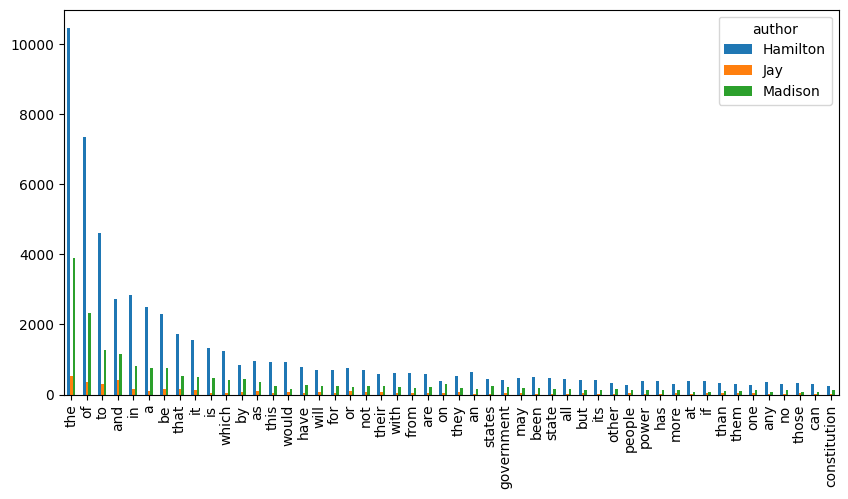

In [85]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_fed_top["author"] = authors["Author"]

df_fed_top.groupby("author").sum().T.plot.bar(figsize=(10, 5))

In [86]:
# find papers where author is not known
df_fed_top[df_fed_top["author"].isna()]

,the,of,to,and,in,a,be,that,it,is,...,if,than,them,one,any,no,those,can,constitution,author
17,240,135,54,79,41,37,6,21,26,10,...,0,7,2,6,2,2,5,0,2,NaN
18,208,125,59,82,41,27,14,13,19,16,...,4,3,7,9,6,6,0,1,3,NaN
19,137,81,42,54,39,28,7,9,12,15,...,1,5,5,4,0,2,1,1,5,NaN
48,178,101,58,42,34,33,47,21,26,18,...,3,1,7,4,3,4,1,4,4,NaN
49,101,60,28,33,28,14,31,12,16,6,...,4,0,8,4,5,0,1,0,7,NaN
50,202,113,50,40,50,46,63,25,32,20,...,7,3,3,4,1,4,3,3,3,NaN
51,186,101,72,37,33,35,46,30,32,19,...,5,0,4,4,7,4,4,7,4,NaN
52,194,128,73,62,45,48,51,24,18,28,...,7,7,7,7,6,10,5,13,6,NaN
53,204,117,61,38,65,35,40,28,27,35,...,5,4,10,7,7,8,6,0,10,NaN
54,182,122,78,48,30,48,52,32,17,25,...,5,15,4,10,8,4,0,8,5,NaN


### Question 3

Recall that 15 of the papers have disputed authorship. How could you use the topics we have covered to "predict" the authors of these 15?

**Brainstorm some ideas before proceeding!** (Just making sure you discuss this question before moving on to the next part.)

**YOUR RESPONSE HERE.**

### Question 4

For each of the documents with disputed authorships, find the 5 most similar documents with _known_ authorships, using cosine distance on the term frequencies. Use the authors of these 5 most similar documents to predict the author of each disputed document.

For example, if 3 of the 5 closest documents were written by Hamilton, 1 by Madison, and 1 by Jay, then we would predict that the disputed document was written by Hamilton.

In [87]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_words = df_fed_top.drop(columns = "author")
df_words

,the,of,to,and,in,a,be,that,it,is,...,at,if,than,them,one,any,no,those,can,constitution
0,133,106,72,40,27,25,34,28,20,13,...,8,4,11,2,4,6,3,9,3,8
1,107,83,53,83,34,30,15,44,38,16,...,10,3,5,4,10,1,1,2,0,0
2,93,62,56,60,25,13,31,20,21,7,...,1,7,8,8,8,5,2,6,3,0
3,86,72,51,90,24,16,26,17,28,10,...,2,14,9,12,13,5,1,4,8,0
4,66,53,45,72,28,9,31,23,21,7,...,4,3,9,11,10,3,2,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,389,248,163,88,135,87,85,49,65,61,...,7,6,6,16,10,15,8,12,6,13
81,168,94,83,41,38,22,36,19,13,15,...,2,2,3,4,9,1,4,6,5,4
82,485,331,219,121,213,139,105,121,102,116,...,19,24,16,21,18,16,22,13,6,13
83,390,293,140,89,91,72,94,84,64,68,...,10,8,16,5,5,32,27,9,11,28


In [88]:
df_words_known = df_fed_top.dropna()
df_words

,the,of,to,and,in,a,be,that,it,is,...,at,if,than,them,one,any,no,those,can,constitution
0,133,106,72,40,27,25,34,28,20,13,...,8,4,11,2,4,6,3,9,3,8
1,107,83,53,83,34,30,15,44,38,16,...,10,3,5,4,10,1,1,2,0,0
2,93,62,56,60,25,13,31,20,21,7,...,1,7,8,8,8,5,2,6,3,0
3,86,72,51,90,24,16,26,17,28,10,...,2,14,9,12,13,5,1,4,8,0
4,66,53,45,72,28,9,31,23,21,7,...,4,3,9,11,10,3,2,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,389,248,163,88,135,87,85,49,65,61,...,7,6,6,16,10,15,8,12,6,13
81,168,94,83,41,38,22,36,19,13,15,...,2,2,3,4,9,1,4,6,5,4
82,485,331,219,121,213,139,105,121,102,116,...,19,24,16,21,18,16,22,13,6,13
83,390,293,140,89,91,72,94,84,64,68,...,10,8,16,5,5,32,27,9,11,28


In [89]:
df_words_unknown = df_fed_top[df_fed_top["author"].isna()]
df_words_unknown

,the,of,to,and,in,a,be,that,it,is,...,if,than,them,one,any,no,those,can,constitution,author
17,240,135,54,79,41,37,6,21,26,10,...,0,7,2,6,2,2,5,0,2,NaN
18,208,125,59,82,41,27,14,13,19,16,...,4,3,7,9,6,6,0,1,3,NaN
19,137,81,42,54,39,28,7,9,12,15,...,1,5,5,4,0,2,1,1,5,NaN
48,178,101,58,42,34,33,47,21,26,18,...,3,1,7,4,3,4,1,4,4,NaN
49,101,60,28,33,28,14,31,12,16,6,...,4,0,8,4,5,0,1,0,7,NaN
50,202,113,50,40,50,46,63,25,32,20,...,7,3,3,4,1,4,3,3,3,NaN
51,186,101,72,37,33,35,46,30,32,19,...,5,0,4,4,7,4,4,7,4,NaN
52,194,128,73,62,45,48,51,24,18,28,...,7,7,7,7,6,10,5,13,6,NaN
53,204,117,61,38,65,35,40,28,27,35,...,5,4,10,7,7,8,6,0,10,NaN
54,182,122,78,48,30,48,52,32,17,25,...,5,15,4,10,8,4,0,8,5,NaN


In [92]:
similarity = cosine_distances(df_words_known.drop(columns = "author"), df_words_unknown.drop(columns = "author"))
similarity

array([[0.06163171, 0.04954171, 0.05008331, ..., 0.0316916 , 0.02339454,
        0.02846986],
       [0.09058015, 0.0800768 , 0.0722539 , ..., 0.09692819, 0.07102533,
        0.07976563],
       [0.11572583, 0.09359515, 0.08355464, ..., 0.07962086, 0.0660948 ,
        0.08194166],
       ...,
       [0.06865084, 0.05784626, 0.04796327, ..., 0.02915487, 0.02542311,
        0.02755898],
       [0.04953255, 0.04131245, 0.04318488, ..., 0.0203202 , 0.01957888,
        0.01722587],
       [0.04612804, 0.03275072, 0.03334716, ..., 0.02458903, 0.01932059,
        0.02388753]])

In [93]:
df_similarities = pd.DataFrame(
    similarity,
    index=df_words_known.index,
    columns=df_words_unknown.index,
)

df_similarities

,17,18,19,48,49,50,51,52,53,54,55,56,57,61,62
0,0.061632,0.049542,0.050083,0.035983,0.042740,0.043352,0.027334,0.022030,0.041511,0.016794,0.029955,0.018755,0.031692,0.023395,0.028470
1,0.090580,0.080077,0.072254,0.091068,0.080244,0.114337,0.089285,0.082206,0.103760,0.082400,0.085407,0.080602,0.096928,0.071025,0.079766
2,0.115726,0.093595,0.083555,0.088727,0.075090,0.092348,0.080713,0.057803,0.088618,0.067537,0.081713,0.069808,0.079621,0.066095,0.081942
3,0.137888,0.111900,0.108667,0.122651,0.102152,0.144074,0.133958,0.101007,0.145145,0.110958,0.109711,0.111519,0.133782,0.100430,0.126037
4,0.169384,0.143169,0.145524,0.140053,0.120383,0.174775,0.158554,0.134560,0.174203,0.134878,0.140950,0.152304,0.158153,0.127062,0.156428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.047596,0.040376,0.036970,0.023062,0.029240,0.023150,0.017105,0.017558,0.013316,0.023742,0.033104,0.022329,0.017443,0.023077,0.019142
81,0.052844,0.040618,0.046220,0.027059,0.041402,0.041811,0.024437,0.028253,0.031480,0.024895,0.050565,0.029510,0.034695,0.041564,0.034292
82,0.068651,0.057846,0.047963,0.038331,0.042525,0.040973,0.029307,0.026835,0.021628,0.034083,0.046851,0.033930,0.029155,0.025423,0.027559
83,0.049533,0.041312,0.043185,0.022490,0.030650,0.025780,0.018075,0.015586,0.019532,0.015301,0.024859,0.010443,0.020320,0.019579,0.017226


In [94]:
df_similarities["author"] = df_words_known["author"]

df_similarities

,17,18,19,48,49,50,51,52,53,54,55,56,57,61,62,author
0,0.061632,0.049542,0.050083,0.035983,0.042740,0.043352,0.027334,0.022030,0.041511,0.016794,0.029955,0.018755,0.031692,0.023395,0.028470,Hamilton
1,0.090580,0.080077,0.072254,0.091068,0.080244,0.114337,0.089285,0.082206,0.103760,0.082400,0.085407,0.080602,0.096928,0.071025,0.079766,Jay
2,0.115726,0.093595,0.083555,0.088727,0.075090,0.092348,0.080713,0.057803,0.088618,0.067537,0.081713,0.069808,0.079621,0.066095,0.081942,Jay
3,0.137888,0.111900,0.108667,0.122651,0.102152,0.144074,0.133958,0.101007,0.145145,0.110958,0.109711,0.111519,0.133782,0.100430,0.126037,Jay
4,0.169384,0.143169,0.145524,0.140053,0.120383,0.174775,0.158554,0.134560,0.174203,0.134878,0.140950,0.152304,0.158153,0.127062,0.156428,Jay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.047596,0.040376,0.036970,0.023062,0.029240,0.023150,0.017105,0.017558,0.013316,0.023742,0.033104,0.022329,0.017443,0.023077,0.019142,Hamilton
81,0.052844,0.040618,0.046220,0.027059,0.041402,0.041811,0.024437,0.028253,0.031480,0.024895,0.050565,0.029510,0.034695,0.041564,0.034292,Hamilton
82,0.068651,0.057846,0.047963,0.038331,0.042525,0.040973,0.029307,0.026835,0.021628,0.034083,0.046851,0.033930,0.029155,0.025423,0.027559,Hamilton
83,0.049533,0.041312,0.043185,0.022490,0.030650,0.025780,0.018075,0.015586,0.019532,0.015301,0.024859,0.010443,0.020320,0.019579,0.017226,Hamilton


In [114]:
similar_papers = {}
for paper in df_similarities.columns:
    similar = df_similarities[paper].sort_values().index[:5].tolist()
    similar_authors = df_similarities.loc[similar, "author"].tolist()
    author = Counter(similar_authors).most_common(1)[0][0]
    similar_papers[paper] = author

similar_papers

{17: 'Madison',
 18: 'Madison',
 19: 'Madison',
 48: 'Hamilton',
 49: 'Madison',
 50: 'Madison',
 51: 'Hamilton',
 52: 'Madison',
 53: 'Madison',
 54: 'Hamilton',
 55: 'Hamilton',
 56: 'Madison',
 57: 'Madison',
 61: 'Madison',
 62: 'Madison',
 'author': 'Hamilton'}

In [115]:
for paper in similar_papers:
    if paper in df_words_unknown.index:
        print("Paper {} was most likely written by {}.".format(paper+1, similar_papers[paper]))


Paper 18 was most likely written by Madison.
Paper 19 was most likely written by Madison.
Paper 20 was most likely written by Madison.
Paper 49 was most likely written by Hamilton.
Paper 50 was most likely written by Madison.
Paper 51 was most likely written by Madison.
Paper 52 was most likely written by Hamilton.
Paper 53 was most likely written by Madison.
Paper 54 was most likely written by Madison.
Paper 55 was most likely written by Hamilton.
Paper 56 was most likely written by Hamilton.
Paper 57 was most likely written by Madison.
Paper 58 was most likely written by Madison.
Paper 62 was most likely written by Madison.
Paper 63 was most likely written by Madison.
